## **Mohsin Bin Ramzan F22607016 ML ESE Q1**

## ***Question 1***

In [44]:
#loading Iris Datset
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
print(iris_df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


# **Exploring The Dataset**

In [45]:
print(iris_df.shape)
print(iris_df.info())
print(iris_df.describe())
print(iris_df.isnull().sum())
print(iris_df['target'].value_counts())

(150, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.30000

## **Histogram and pairplot For each Feature**

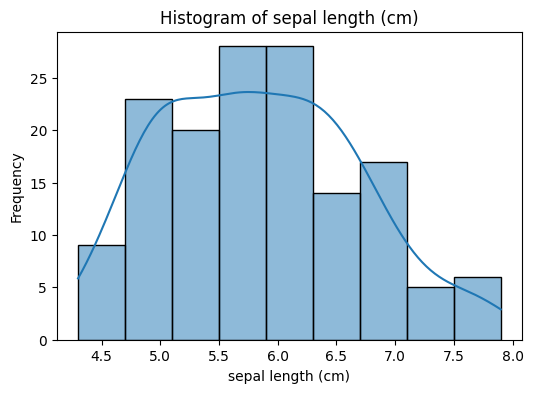

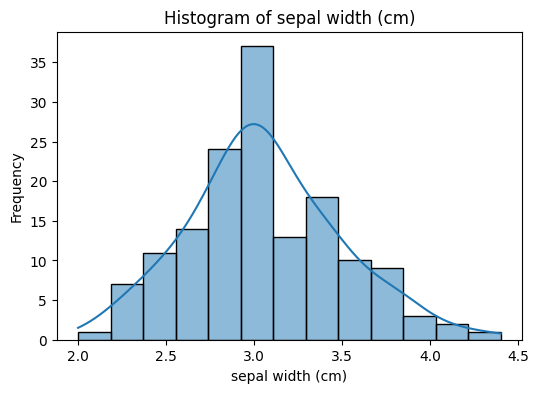

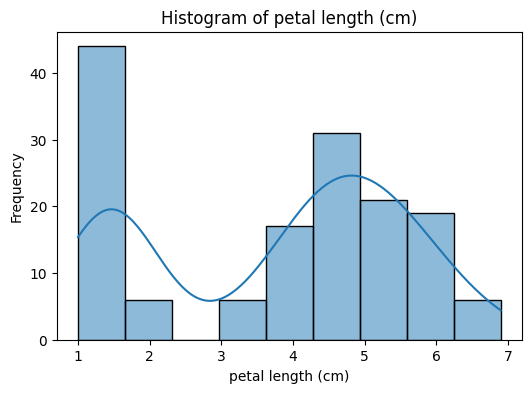

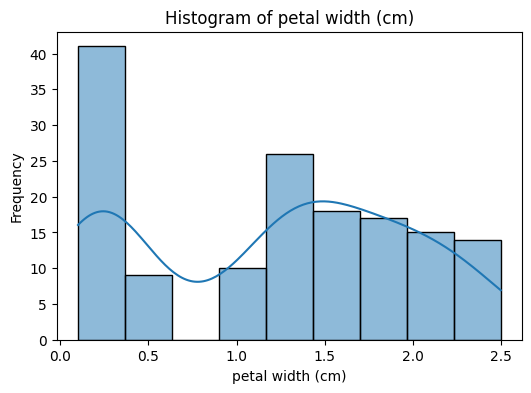

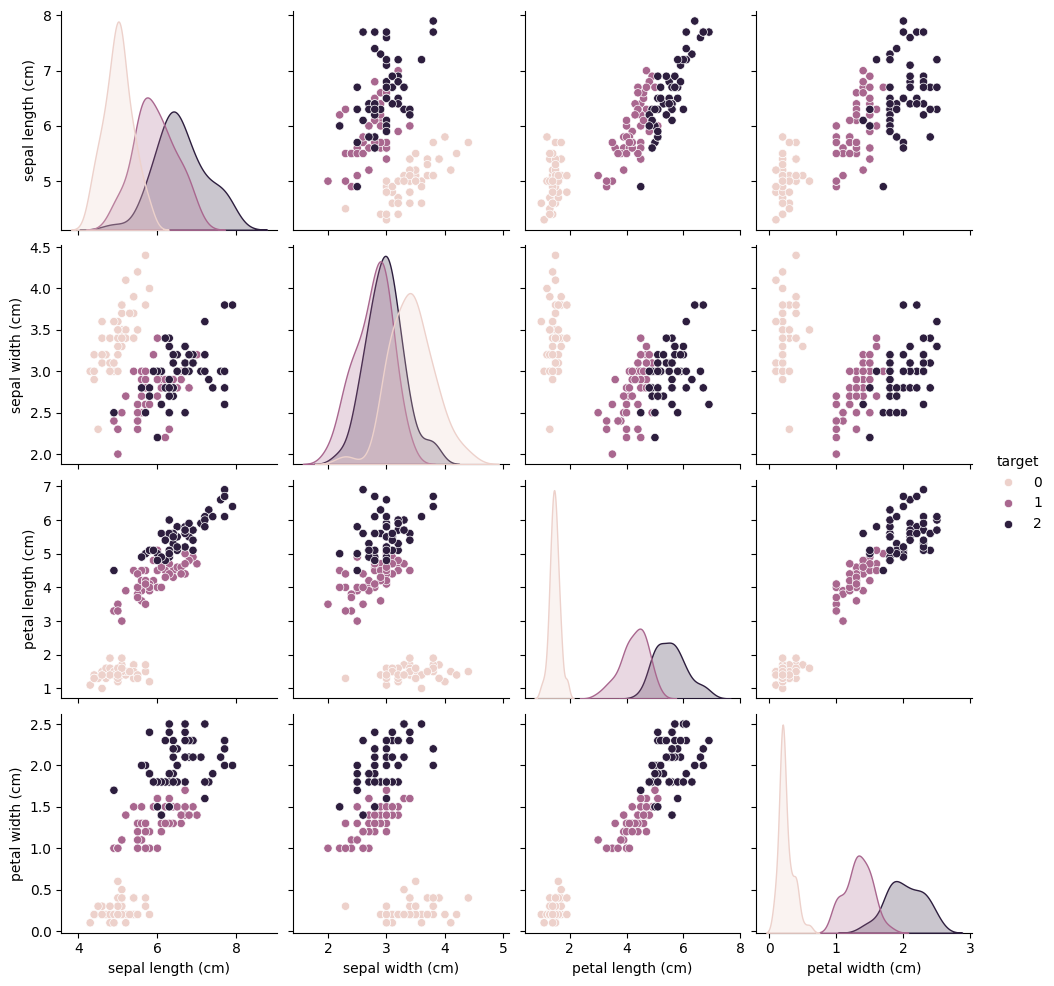

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Create histograms for each feature
for col in iris_df.columns[:-1]:
    plt.figure(figsize=(6, 4))
    sns.histplot(iris_df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Create pair plots for all features
sns.pairplot(iris_df, hue='target', diag_kind='kde')
plt.show()

## **Checking For Coorelations and plotting coorelation matrix**


Correlation Matrix:
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   
target                      0.782561         -0.426658           0.949035   

                   petal width (cm)    target  
sepal length (cm)          0.817941  0.782561  
sepal width (cm)          -0.366126 -0.426658  
petal length (cm)          0.962865  0.949035  
petal width (cm)           1.000000  0.956547  
target                     0.956547  1.000000  


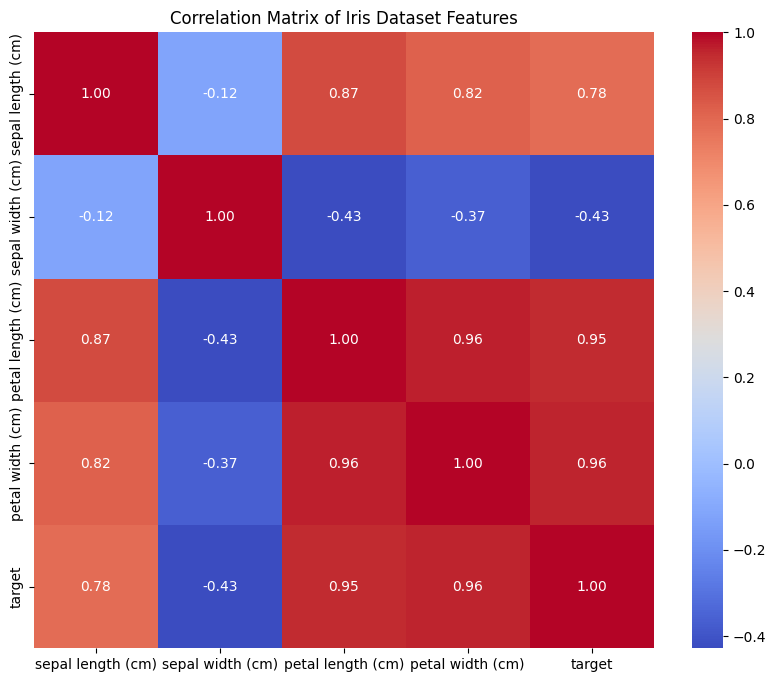

In [47]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation Check
correlation_matrix = iris_df.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Plotting the Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Iris Dataset Features')
plt.show()

# **Apply  Necessary pre processing**

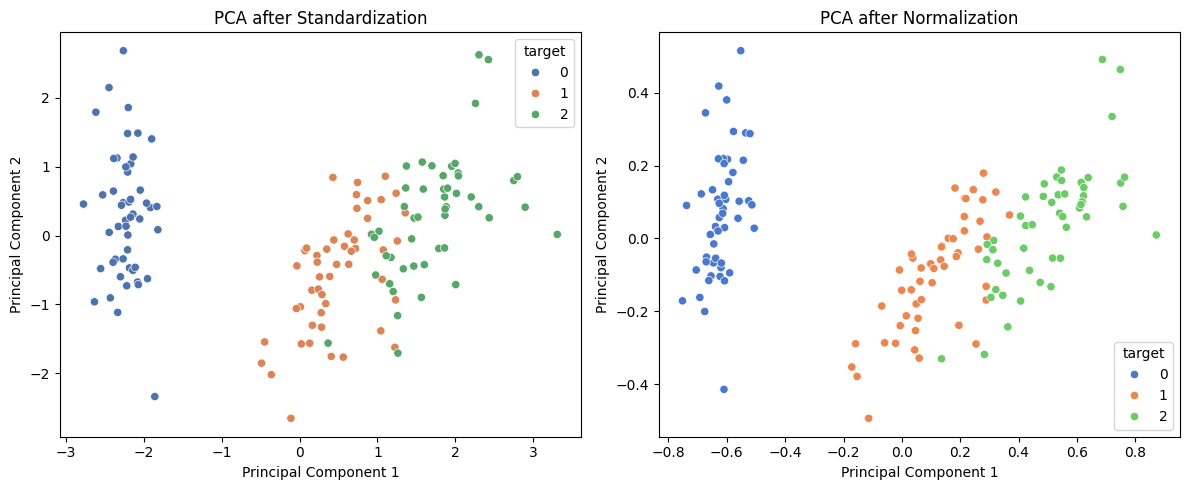


Explained Variance Ratio (Standardized): [0.72962445 0.22850762]
Explained Variance Ratio (Normalized): [0.84136038 0.11751808]


In [48]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# 1. Standardization (Mean = 0, Std = 1)
scaler = StandardScaler()
iris_standardized = scaler.fit_transform(iris_df.drop('target', axis=1))
iris_standardized_df = pd.DataFrame(iris_standardized, columns=iris.feature_names)

# 2. Normalization (Range 0 to 1)
normalizer = MinMaxScaler()
iris_normalized = normalizer.fit_transform(iris_df.drop('target', axis=1))
iris_normalized_df = pd.DataFrame(iris_normalized, columns=iris.feature_names)

# PCA after Standardization
pca_std = PCA(n_components=2)
iris_pca_std = pca_std.fit_transform(iris_standardized)
iris_pca_std_df = pd.DataFrame(data=iris_pca_std, columns=['PC1', 'PC2'])
iris_pca_std_df['target'] = iris_df['target']

# PCA after Normalization
pca_norm = PCA(n_components=2)
iris_pca_norm = pca_norm.fit_transform(iris_normalized)
iris_pca_norm_df = pd.DataFrame(data=iris_pca_norm, columns=['PC1', 'PC2'])
iris_pca_norm_df['target'] = iris_df['target']

# Plotting PCA after Standardization
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x='PC1', y='PC2', hue='target', data=iris_pca_std_df, palette='deep')
plt.title('PCA after Standardization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Plotting PCA after Normalization
plt.subplot(1, 2, 2)
sns.scatterplot(x='PC1', y='PC2', hue='target', data=iris_pca_norm_df, palette='muted')
plt.title('PCA after Normalization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()

# Print explained variance ratios
print("\nExplained Variance Ratio (Standardized):", pca_std.explained_variance_ratio_)
print("Explained Variance Ratio (Normalized):", pca_norm.explained_variance_ratio_)


# **Hierarhical Clustering to to cluster the dataset using 2 different linkage methods (single linkage and complete linkage)**

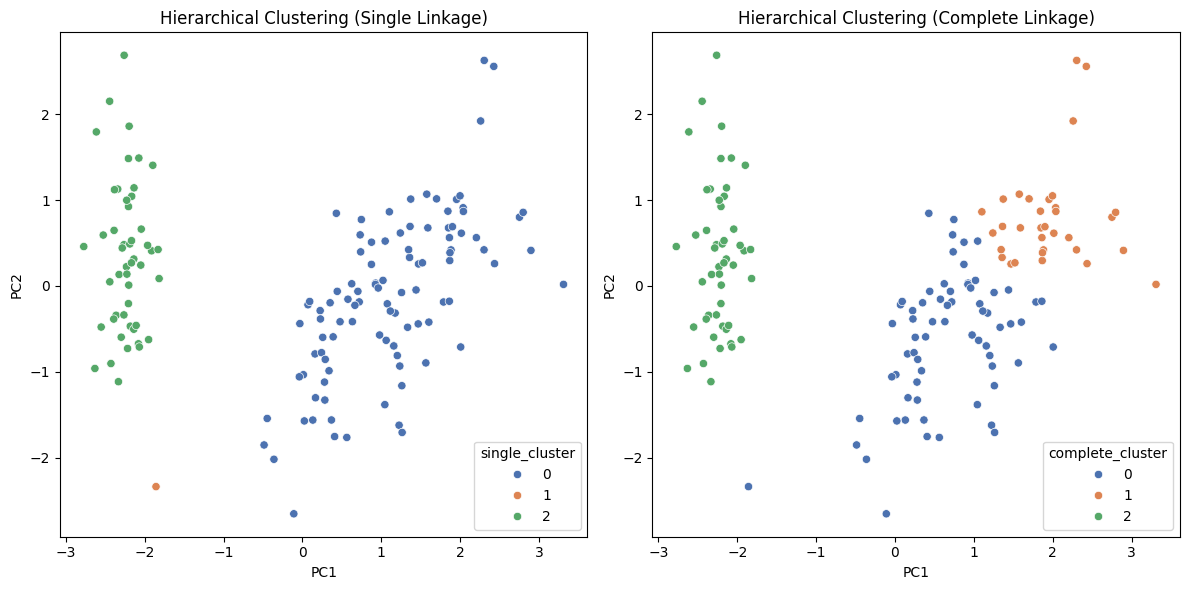

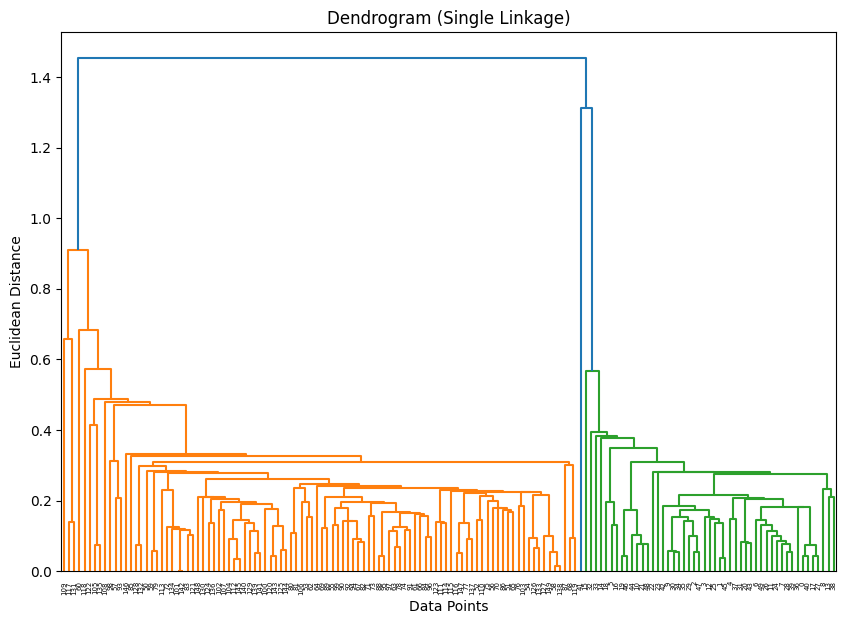

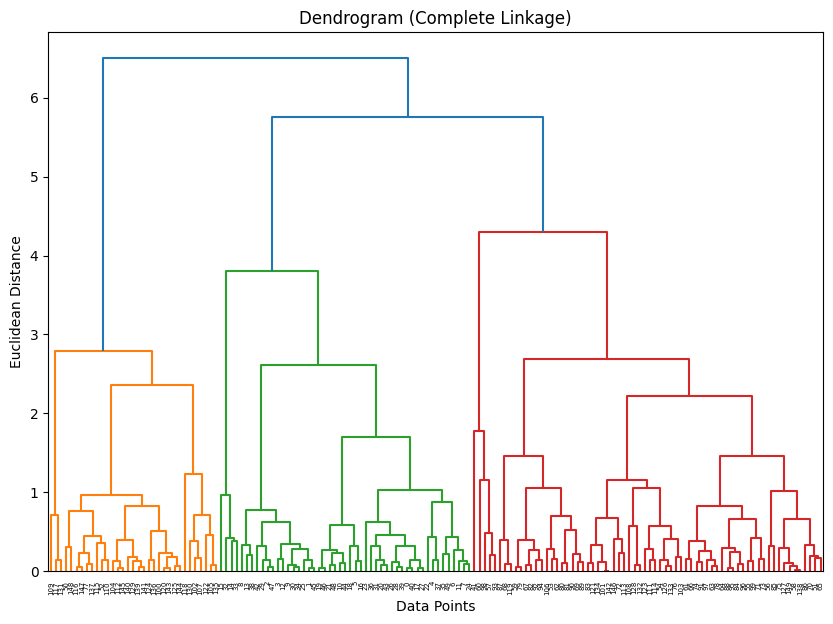

In [49]:

import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# Hierarchical Clustering
plt.figure(figsize=(12, 6))

# Single Linkage
single_linkage = AgglomerativeClustering(n_clusters=3, linkage='single')
iris_pca_std_df['single_cluster'] = single_linkage.fit_predict(iris_pca_std_df[['PC1', 'PC2']])
plt.subplot(1, 2, 1)
sns.scatterplot(x='PC1', y='PC2', hue='single_cluster', data=iris_pca_std_df, palette='deep')
plt.title('Hierarchical Clustering (Single Linkage)')

# Complete Linkage
complete_linkage = AgglomerativeClustering(n_clusters=3, linkage='complete')
iris_pca_std_df['complete_cluster'] = complete_linkage.fit_predict(iris_pca_std_df[['PC1', 'PC2']])

plt.subplot(1, 2, 2)
sns.scatterplot(x='PC1', y='PC2', hue='complete_cluster', data=iris_pca_std_df, palette='deep')
plt.title('Hierarchical Clustering (Complete Linkage)')

plt.tight_layout()
plt.show()

# Dendrograms
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(iris_pca_std_df[['PC1', 'PC2']], method='single'))
plt.title('Dendrogram (Single Linkage)')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()


plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(iris_pca_std_df[['PC1', 'PC2']], method='complete'))
plt.title('Dendrogram (Complete Linkage)')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

# **Cut the dendogram at a specific distance to create the desired number of cluster**

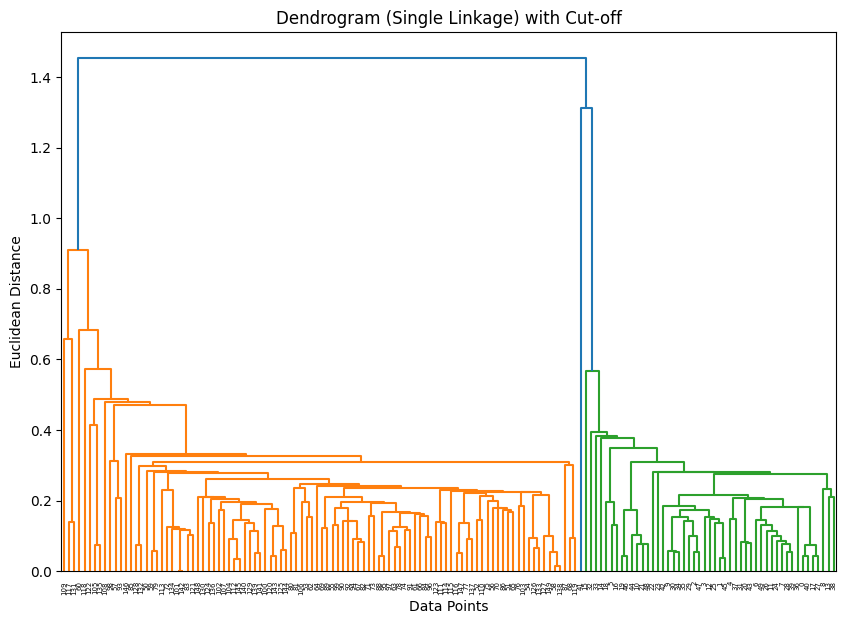

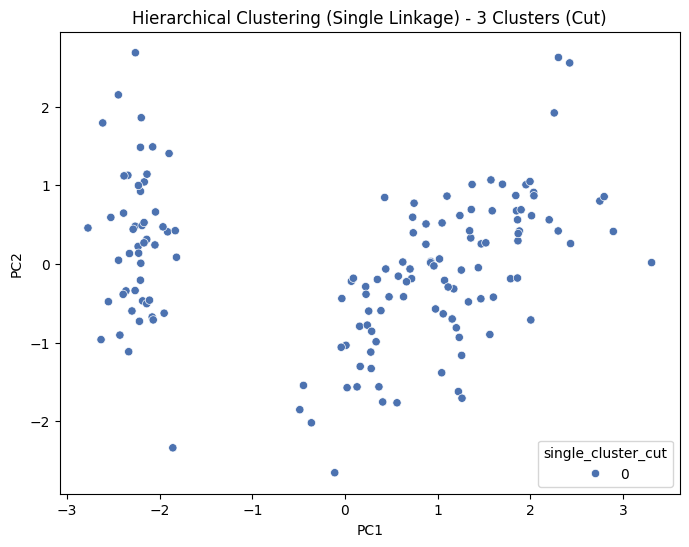

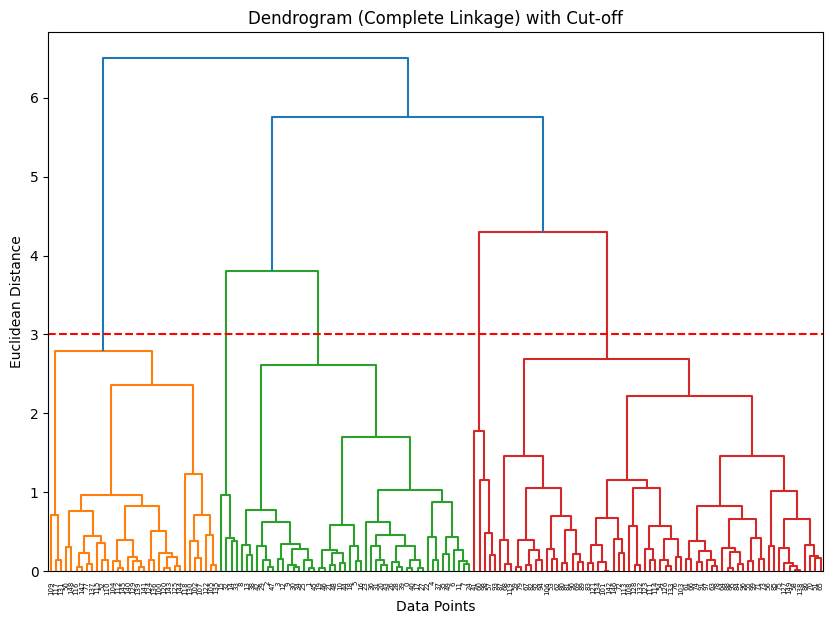

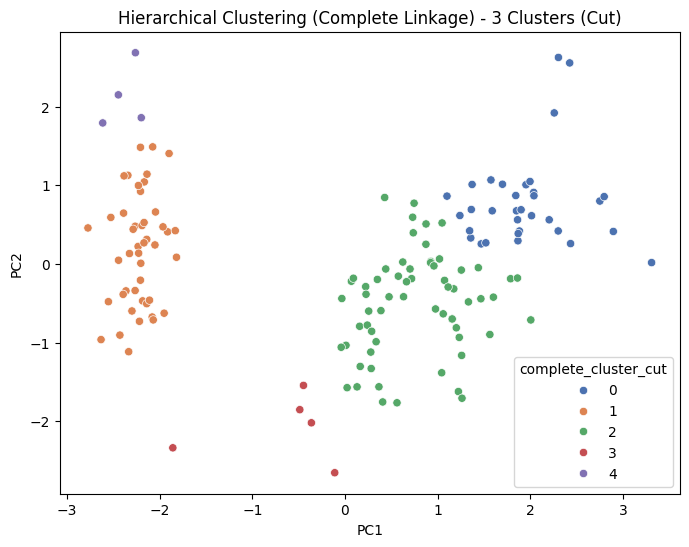

In [50]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# dendrogram at a distance of 3 to create clusters
desired_clusters = 3
distance_threshold = 3  # Adjust  distance
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(iris_pca_std_df[['PC1', 'PC2']], method='single'))
plt.axhline(y=distance_threshold, color='r', linestyle='--')  # Drawing a horizontal line at  distance
plt.title('Dendrogram (Single Linkage) with Cut-off')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

# Apply Agglomerative Clustering with equired  number of clusters  on the distance threshold
single_linkage_cut = AgglomerativeClustering(n_clusters=None, distance_threshold=distance_threshold, linkage='single')
iris_pca_std_df['single_cluster_cut'] = single_linkage_cut.fit_predict(iris_pca_std_df[['PC1', 'PC2']])

# Visualize the clusters after cutting the dendrogram
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='single_cluster_cut', data=iris_pca_std_df, palette='deep')
plt.title(f'Hierarchical Clustering (Single Linkage) - {desired_clusters} Clusters (Cut)')
plt.show()

# process for complete linkage
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(iris_pca_std_df[['PC1', 'PC2']], method='complete'))
plt.axhline(y=distance_threshold, color='r', linestyle='--')  # Draw a horizontal line at the desired distance
plt.title('Dendrogram (Complete Linkage) with Cut-off')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

complete_linkage_cut = AgglomerativeClustering(n_clusters=None, distance_threshold=distance_threshold, linkage='complete')
iris_pca_std_df['complete_cluster_cut'] = complete_linkage_cut.fit_predict(iris_pca_std_df[['PC1', 'PC2']])

# Visualize the clusters after cutting the dendrogram
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='complete_cluster_cut', data=iris_pca_std_df, palette='deep')
plt.title(f'Hierarchical Clustering (Complete Linkage) - {desired_clusters} Clusters (Cut)')
plt.show()

# **Evaluating the Clustering quality using internal and external measure**

In [51]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, rand_score

# Calculate Silhouette Score
silhouette_avg_single = silhouette_score(iris_pca_std_df[['PC1', 'PC2']], iris_pca_std_df['single_cluster'])
silhouette_avg_complete = silhouette_score(iris_pca_std_df[['PC1', 'PC2']], iris_pca_std_df['complete_cluster'])
print(f"Silhouette Score (Single Linkage): {silhouette_avg_single}")
print(f"Silhouette Score (Complete Linkage): {silhouette_avg_complete}")

# Calculate Rand Index
rand_index_single = rand_score(iris_pca_std_df['target'], iris_pca_std_df['single_cluster'])
rand_index_complete = rand_score(iris_pca_std_df['target'], iris_pca_std_df['complete_cluster'])

print(f"Rand Index (Single Linkage): {rand_index_single}")
print(f"Rand Index (Complete Linkage): {rand_index_complete}")

Silhouette Score (Single Linkage): 0.5381235364065031
Silhouette Score (Complete Linkage): 0.5045787432016524
Rand Index (Single Linkage): 0.7719015659955257
Rand Index (Complete Linkage): 0.8311409395973154


# **saving the result in .png image file**

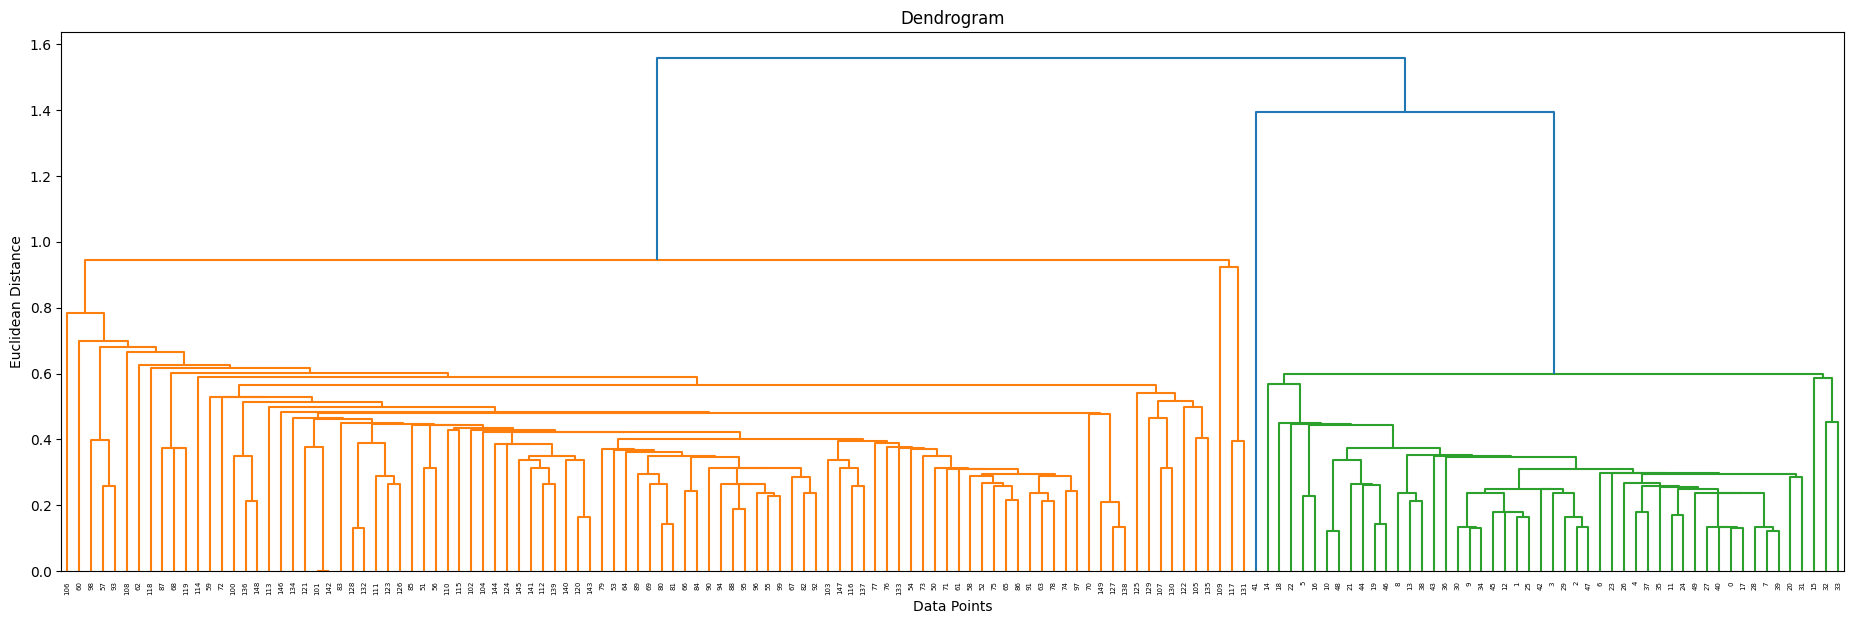

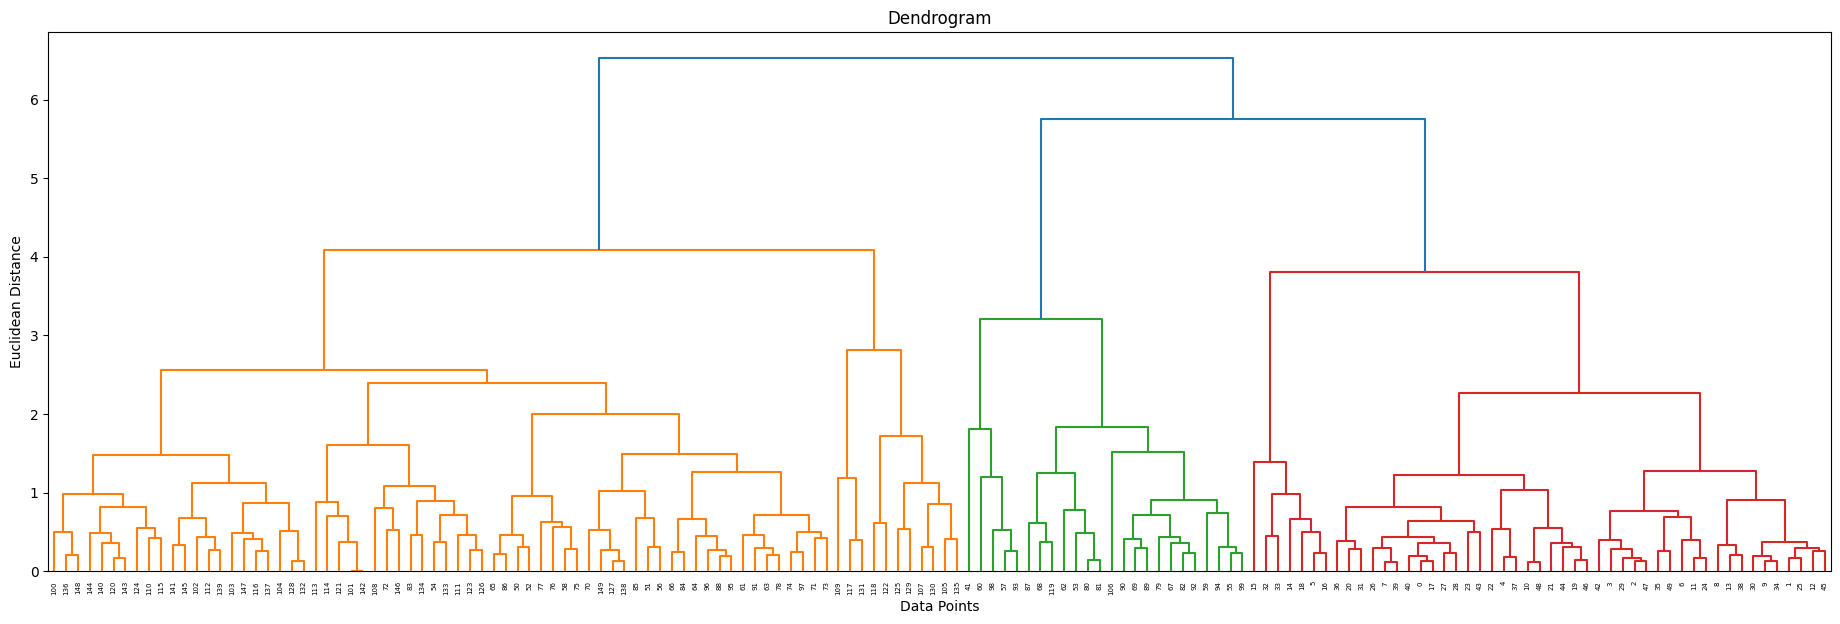

In [52]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score, adjusted_rand_score

# Load the iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# Feature Scaling
X = iris_df.drop('target', axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Calculate linkage matrix
linkage_matrix1 = sch.linkage(X_scaled_df, method='single')
linkage_matrix2 = sch.linkage(X_scaled_df, method='complete')

# Plot the dendrogram and save as PNG
plt.figure(figsize=(23, 7))
dendrogram = sch.dendrogram(linkage_matrix1)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.savefig('dendrogram.png') # Save the plot
plt.show()

plt.figure(figsize=(23, 7))
dendrogram = sch.dendrogram(linkage_matrix2)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.savefig('dendrogram2.png') # Save the plot
plt.show()